In [1]:
import sys
import muon as mu 
import numpy as np
import pandas as pd


# Change path to wherever you have repo locally
sys.path.append('/oak/stanford/groups/engreitz/Users/ymo/Tools/gene_network_evaluation/src')



from plotting import plot_umap_per_gene, plot_top_program_per_gene, perturbed_gene_dotplot,\
                         plot_log2FC, plot_volcano, programs_dotplot, analyze_correlations, \
                         create_gene_correlation_waterfall, \
                         convert_with_mygene, convert_adata_with_mygene, read_npz, \
                         merge_pdfs_in_folder, merge_svgs_to_pdf, create_comprehensive_plot, rename_adata_gene_dictionary, \
                         rename_list_gene_dictionary, plot_umap_per_gene_guide, process_single_gene, parallel_gene_processing

/home/users/ymo/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Find perturbed gene

In [4]:
save_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/cNMF_100_07102024/consensus_NMF/Eval"
#mdata_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Cell_data/Tri_orginal_data.h5mu"
mdata_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Cell_data/Revant_100.h5mu"
perturb_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/shared/250110_ipsc_ec_dashboard_setup/cNMF_100/cNMF_100_gene_sample"
file_to_dictionary = "/oak/stanford/groups/engreitz/Users/ymo/Tools/cNMF_benchmarking/cNMF_benchmarking_pipeline/Evaluation/Resources/weissman_guides_with_coordinates.tsv"

top_program = 5


In [5]:
mdata = mu.read_h5mu(mdata_path)

# found detected perturbed gene
perturbed_gene = np.unique(mdata['cNMF'].uns["guide_targets"])
gene_list = rename_list_gene_dictionary(mdata['rna'].var_names.tolist(),file_to_dictionary) # convert gene id to geene name
perturbed_gene_found = list(set(gene_list) & set(perturbed_gene.tolist()))

# sort list by alphabetical order 
perturbed_gene_found = sorted(perturbed_gene_found)
len(perturbed_gene_found)

58

In [6]:
# select gene of interest
Target_Gene = perturbed_gene_found[2]
Target_Gene

'AMOTL2'

# UMAP

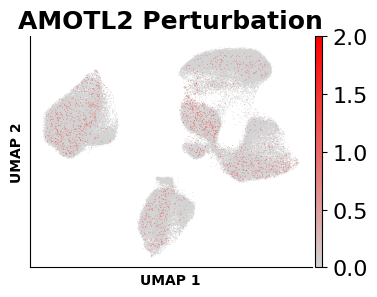

In [5]:
fg = plot_umap_per_gene_guide(mdata, Target_Gene, figsize = (4,3), show = True )

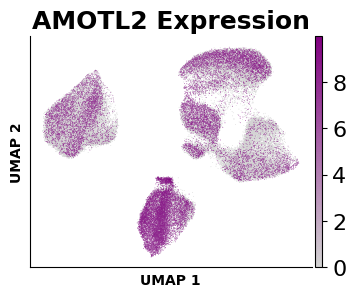

In [6]:
fg = plot_umap_per_gene(mdata, Target_Gene, file_to_dictionary=file_to_dictionary, figsize = (4,3), show = True)

# Top x assigned programs

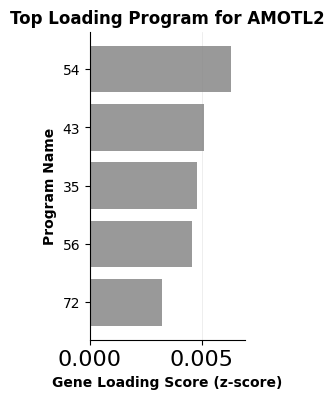

In [7]:
fg = plot_top_program_per_gene(mdata, Target_Gene=Target_Gene,  file_to_dictionary = file_to_dictionary, top_program =top_program, figsize = (2,4), show = True)

# Dot plots

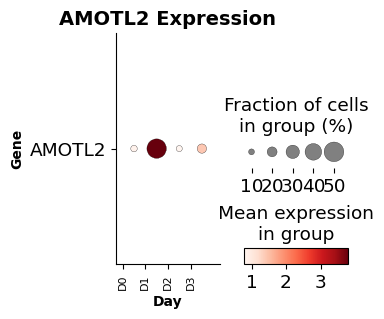

In [8]:
fg = perturbed_gene_dotplot(mdata, Target_Gene, file_to_dictionary=file_to_dictionary, groupby = "sample", figsize = (3,3), show = True)

# Perturbation gene - Log2FC

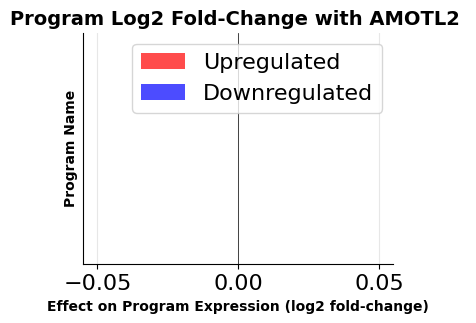

In [9]:
perturb_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/orginal_code/shared/250110_ipsc_ec_dashboard_setup/cNMF_100/cNMF_100_gene_sample_D0_perturbation_association.txt"

_,df = plot_log2FC(perturb_path, Target = Target_Gene, tagert_col_name = "target_name", plot_col_name = "program_name", p_value = 0.05, figsize = (4,3), show = True)

# Perturbation gene - volcano

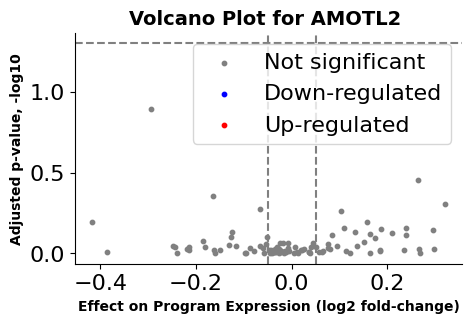

In [10]:
fg = plot_volcano(perturb_path, Target = Target_Gene, down_thred_log = -0.05, up_thred_log = 0.05, p_value = 0.05, figsize = (5,3),show = True)

# Perturbation gene - dotplot

In [11]:

fg = programs_dotplot(mdata, program_list = df["program_name"].tolist(), Target = Target_Gene, save_path = None, save_name = None, figsize = (5,3),show = True)

No significant Gene


# Correlation of program

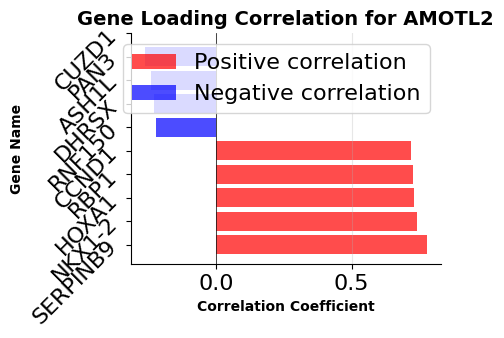

In [12]:
fg,dp = analyze_correlations(mdata, Target_Gene, file_to_dictionary=file_to_dictionary, figsize = (4,3), show = True)

# Waterfall plot

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


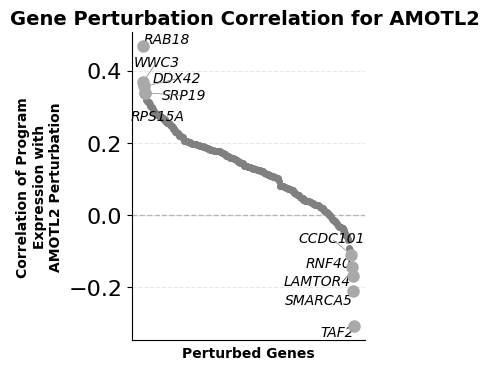

In [43]:
perturb_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/orginal_code/shared/250110_ipsc_ec_dashboard_setup/cNMF_100/cNMF_100_gene_sample_D0_perturbation_association.txt"

fg = create_gene_correlation_waterfall(perturb_path, Target_Gene, top_num=5, figsize=(3, 4)) 


# Make SVG

In [14]:
save_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/cNMF_100_07102024/consensus_NMF/Plot"
mdata_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/analysis/240816_clustering_annotation_package/cNMF_100_0.2_preprocessed.h5mu"
perturb_path_all = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/orginal_code/shared/250110_ipsc_ec_dashboard_setup/cNMF_100/cNMF_100_gene_sample"
perturb_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/orginal_code/shared/250110_ipsc_ec_dashboard_setup/cNMF_100/cNMF_100_gene_sample_D0_perturbation_association.txt"
PDF = True
top_program = 5

No significant Gene
No significant Gene


/tmp/ipykernel_1608/2985229041.py:238: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saving figure to /oak/stanford/groups/engreitz/Users/ymo/Tools/cNMF_benchmarking/cNMF_benchmarking_pipeline/Plotting/JupterNote_Version/test2.pdf...


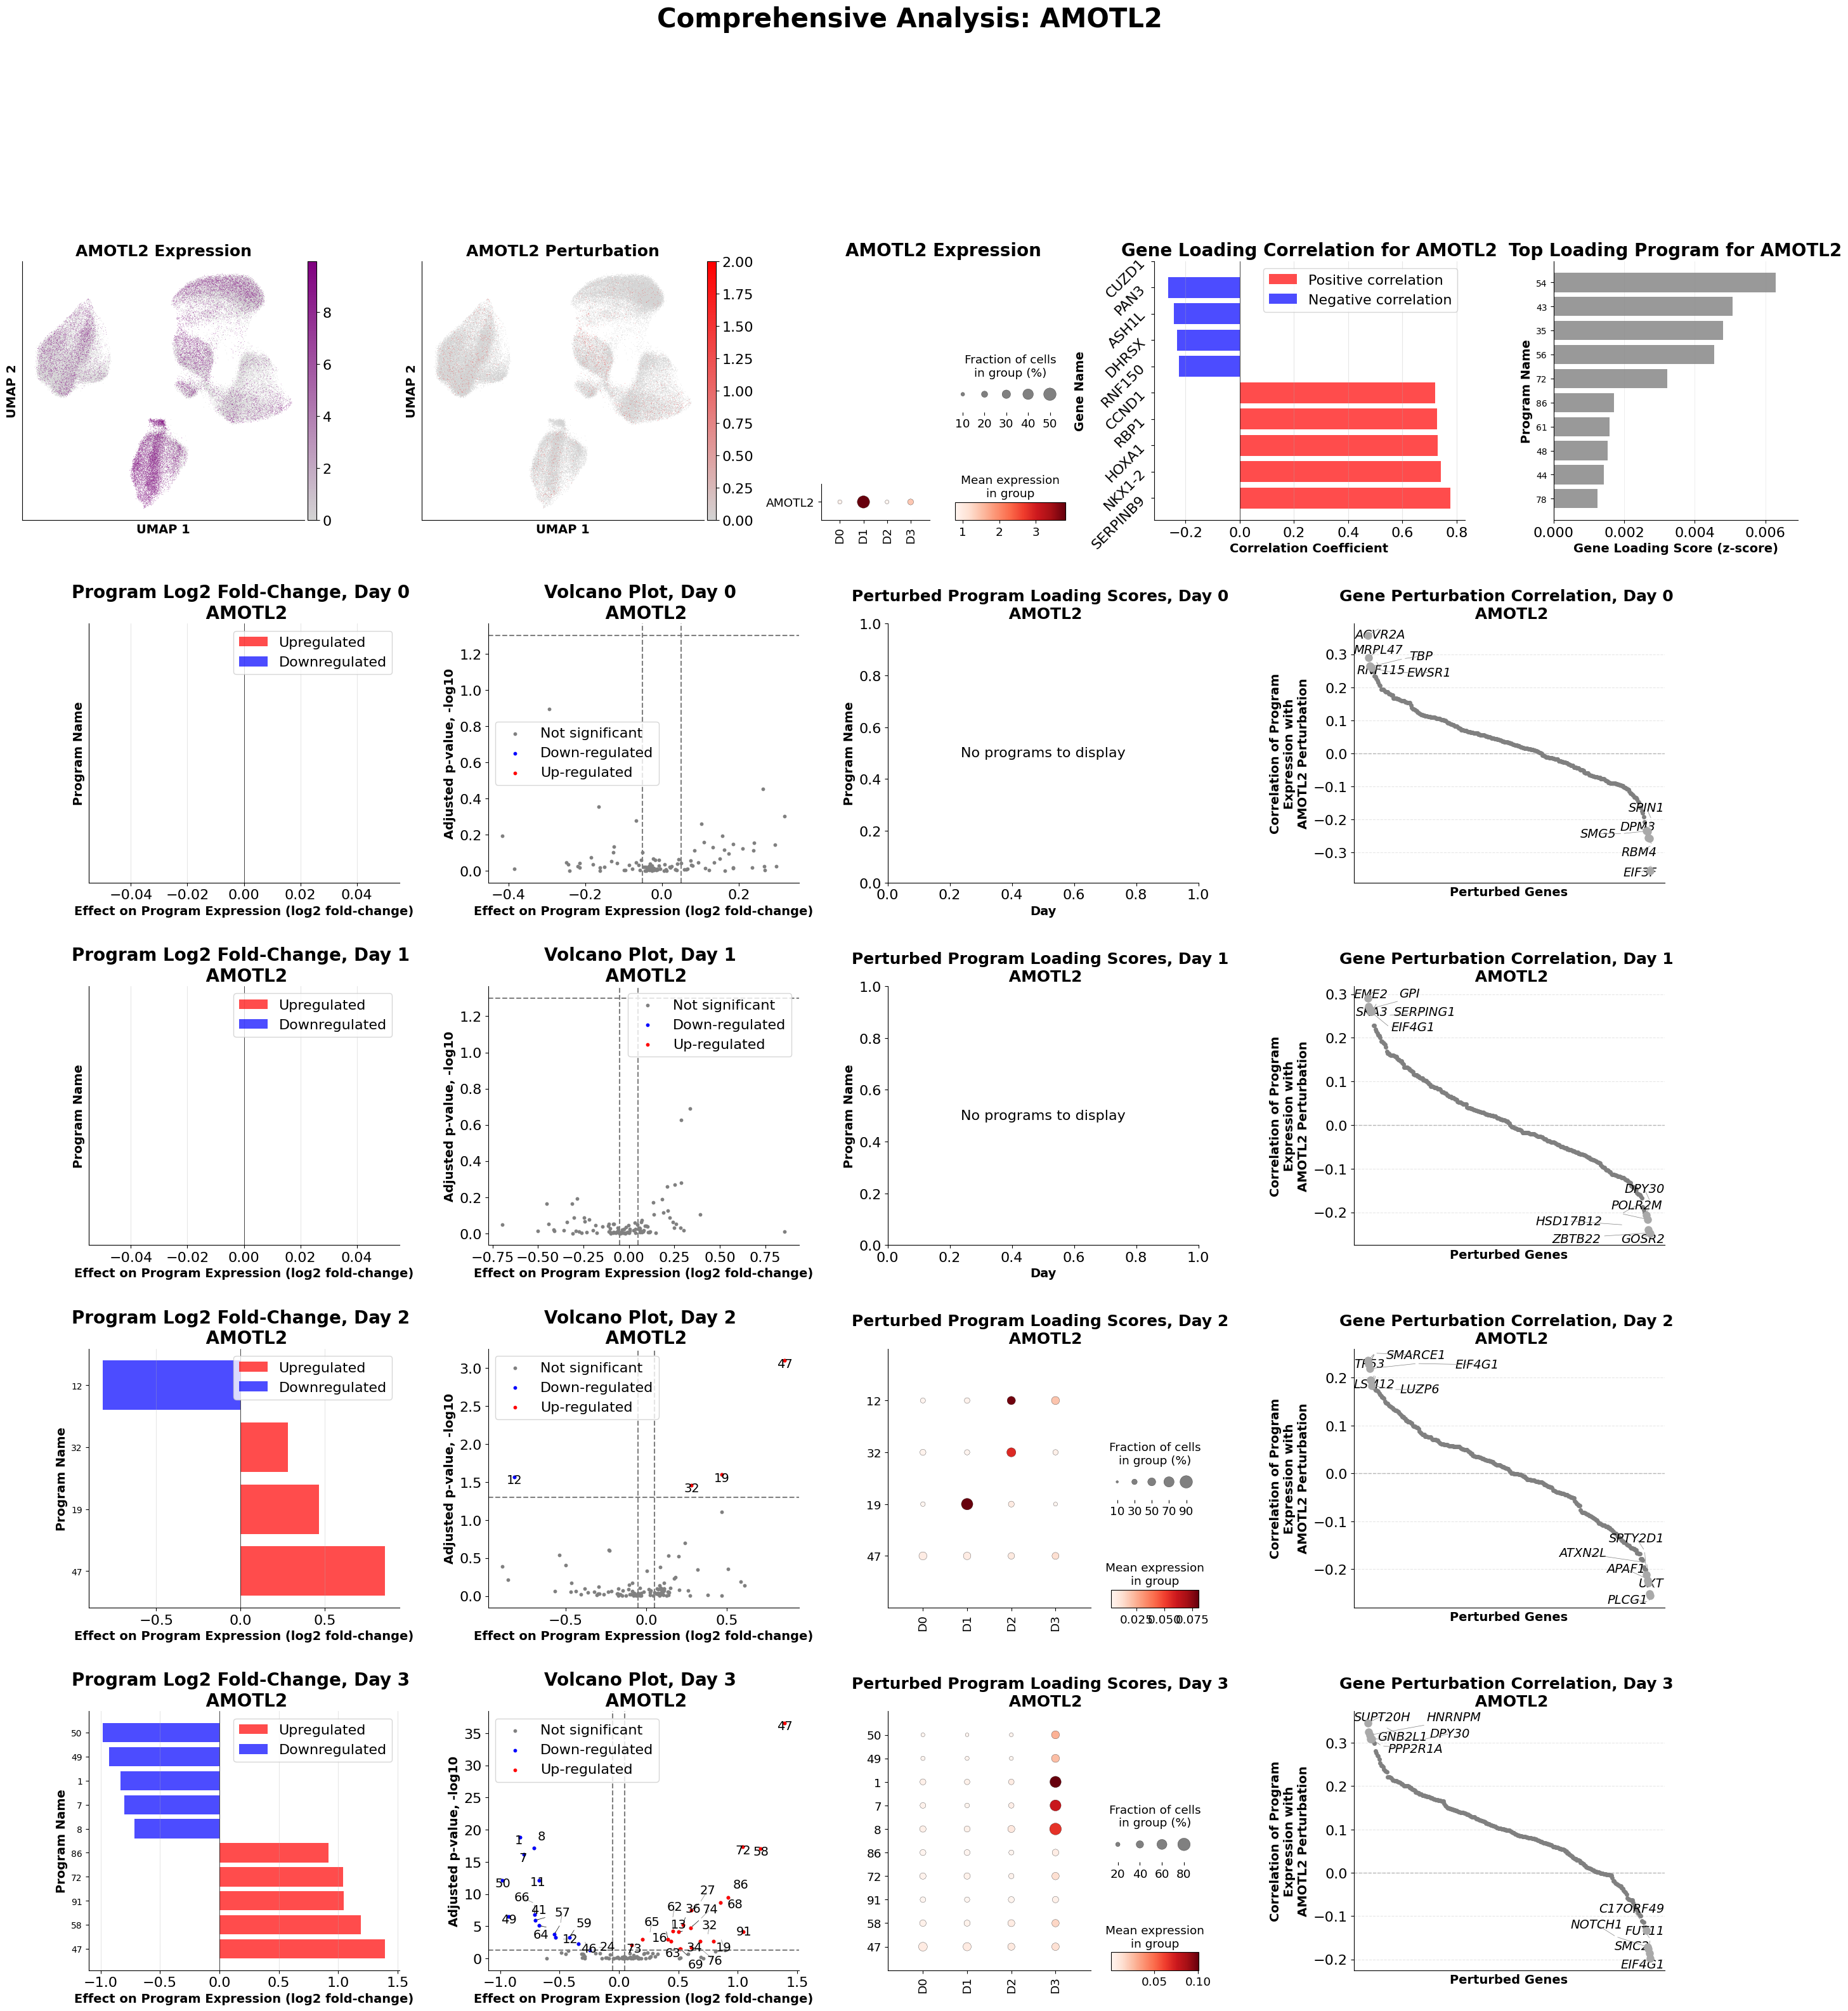

In [35]:
create_comprehensive_plot(
    mdata = mdata,
    perturb_path = perturb_path_all,
    Target_Gene = Target_Gene,
    file_to_dictionary =file_to_dictionary,
    save_path="/oak/stanford/groups/engreitz/Users/ymo/Tools/cNMF_benchmarking/cNMF_benchmarking_pipeline/Plotting/JupterNote_Version",
    save_name="test2",
    figsize=(35, 35),
    show=True,
    PDF = PDF,
)

In [ ]:
# Graph all pdf 
for gene in perturbed_gene_found:

    create_comprehensive_plot(
        mdata = mdata,
        perturb_path = perturb_path_all,
        Target_Gene = Target_Gene,
        file_to_dictionary = file_to_dictionary,
        save_path = save_path,
        save_name = gene,
        figsize=(30, 30),
        show=False,
        PDF = True,
        samples= ['D0', 'sample_D1', 'sample_D2', 'sample_D3'],
        square_plots=True
    )

    

In [ ]:
result = parallel_gene_processing( 
        mdata = mdata,
        perturb_path = perturb_path_all,
        perturbed_gene_list = perturbed_gene_found,
        file_to_dictionary =file_to_dictionary,
        save_path=save_path,
        figsize=(30, 30),
        show=False,
        PDF=True,
        n_processes = -1
        )

# Make PDF

In [4]:
path  = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/cNMF_100_07102024/consensus_NMF/Plot/Perturb_gene/old"

if PDF:
    merge_pdfs_in_folder(path)
else:
    merge_svgs_to_pdf(path)

Found 58 PDF files
